In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [2]:
#!pip install xgboost

In [3]:
pd.options.display.max_columns=1000
sns.set_theme()

In [4]:
df = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/df.csv')

In [5]:
df.head(1)

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len,is_ninjago
0,001-1,Gears,1965,1,43,5,5,Technic,24696,132a,7,4,Light Gray,Tyre Smooth Old Style - Small,0,7,4,10,29,0


In [6]:
df.shape

(919288, 20)

In [7]:
df.columns

Index(['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'set_num_len',
       'set_name_len', 'theme_name', 'id', 'part_num', 'color_id', 'quantity',
       'color_name', 'part_name', 'is_trans', 'theme_name_len', 'part_num_len',
       'color_name_len', 'part_name_len', 'is_ninjago'],
      dtype='object')

In [8]:
target_names = 'set_num set_name theme_id num_parts set_num_len set_name_len theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()
target_names

['set_num',
 'set_name',
 'theme_id',
 'num_parts',
 'set_num_len',
 'set_name_len',
 'theme_name',
 'id',
 'part_num',
 'color_name',
 'part_name',
 'theme_name_len',
 'is_ninjago']

In [9]:
fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [10]:
fn

['year',
 'color_id',
 'quantity',
 'is_trans',
 'part_num_len',
 'color_name_len',
 'part_name_len']

In [11]:
X = df[fn]
y = df['is_ninjago']

In [12]:
X.columns

Index(['year', 'color_id', 'quantity', 'is_trans', 'part_num_len',
       'color_name_len', 'part_name_len'],
      dtype='object')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

In [14]:
hyper_table_C_test = list()
fn = list()

for i, name in enumerate(X.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)
    
for c in tqdm(np.arange(-5, 5), total=len(df[fn].columns)):
    model = LogisticRegression(C=10.0**c, random_state=1, class_weight='balanced')
    model.fit(X_train[fn], y_train)
    s_train = model.score(X_train[fn], y_train)
    s_test = model.score(X_test[fn], y_test)
    y_pred = model.predict(X_test[fn])

    #conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    hyper_table_C_test.append(dict(C=model.C,
                                train_score=s_train, 
                                test_score=s_test,
                                precision=precision,
                                recall=recall,
                                accuracy=accuracy,
                                f1_score=f1,
                                model=model, 
                                num_features=df[fn].shape[1], 
                                num_rows_train=X_train.shape[0],
                                num_rows_test=X_test.shape[0],
                                last_feature=fn[-1]))

10it [00:57,  5.72s/it]                                                                                                


In [15]:
htC = pd.DataFrame(hyper_table_C_test).sort_values('test_score', ascending=False)
htC

,C,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test,last_feature
0,0.00001,0.582114,0.583559,0.052497,0.552531,0.583559,0.095884,"LogisticRegression(C=1e-05, class_weight='bala...",7,827359,91929,part_name_len
1,0.00010,0.578583,0.579578,0.051798,0.550082,0.579578,0.094680,"LogisticRegression(C=0.0001, class_weight='bal...",7,827359,91929,part_name_len
2,0.00100,0.578073,0.579034,0.051709,0.549809,0.579034,0.094527,"LogisticRegression(C=0.001, class_weight='bala...",7,827359,91929,part_name_len
3,0.01000,0.577732,0.578610,0.051657,0.549809,0.578610,0.094441,"LogisticRegression(C=0.01, class_weight='balan...",7,827359,91929,part_name_len
6,10.00000,0.577698,0.578577,0.051653,0.549809,0.578577,0.094434,"LogisticRegression(C=10.0, class_weight='balan...",7,827359,91929,part_name_len
4,0.10000,0.577708,0.578566,0.051652,0.549809,0.578566,0.094432,"LogisticRegression(C=0.1, class_weight='balanc...",7,827359,91929,part_name_len
5,1.00000,0.577688,0.578566,0.051652,0.549809,0.578566,0.094432,"LogisticRegression(class_weight='balanced', ra...",7,827359,91929,part_name_len
8,1000.00000,0.577653,0.578544,0.051649,0.549809,0.578544,0.094428,"LogisticRegression(C=1000.0, class_weight='bal...",7,827359,91929,part_name_len
9,10000.00000,0.577654,0.578544,0.051649,0.549809,0.578544,0.094428,"LogisticRegression(C=10000.0, class_weight='ba...",7,827359,91929,part_name_len
7,100.00000,0.577645,0.578533,0.051648,0.549809,0.578533,0.094426,"LogisticRegression(C=100.0, class_weight='bala...",7,827359,91929,part_name_len


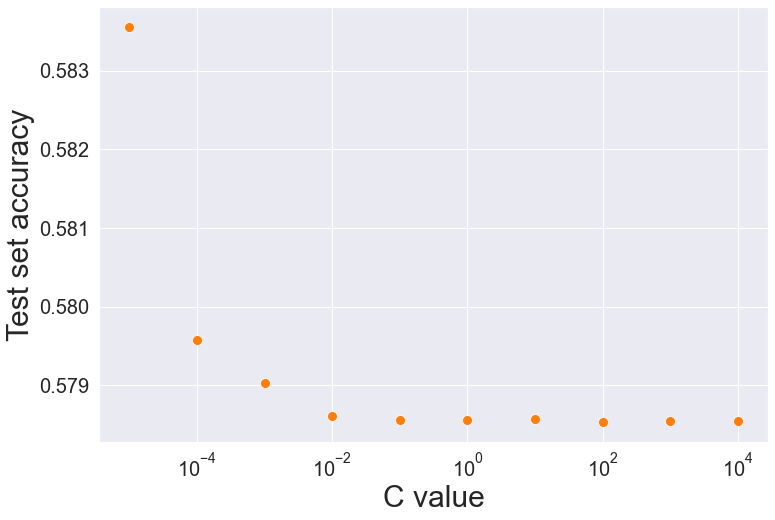

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=htC, x='C', y='test_score', color='tab:orange', s=100)
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_ylabel('Test set accuracy', fontsize=30)
ax.set_xlabel('C value', fontsize=30)
plt.show()

In [17]:
hyper_table = list()
fn = list()
model = LogisticRegression(C=10**-5, random_state=1, class_weight='balanced')

for i, name in tqdm(enumerate(X.columns), total=len(X.columns)):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)
    model.fit(X_train[fn], y_train)
    s_train = model.score(X_train[fn], y_train)
    s_test = model.score(X_test[fn], y_test)
    y_pred = model.predict(X_test[fn])

    #conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    hyper_table.append(dict(sample=model.class_weight,
                            desc=str(fn), 
                            train_score=s_train, 
                            test_score=s_test,
                            precision=precision,
                            recall=recall,
                            accuracy=accuracy,
                            f1_score=f1,
                            model=model, 
                            num_features=df[fn].shape[1], 
                            num_rows_train=X_train.shape[0],
                            num_rows_test=X_test.shape[0], 
                            last_feature=fn[-1]))

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:19<00:00,  2.85s/it]


In [18]:
model_rf = RandomForestClassifier(n_estimators=200, random_state = 1, n_jobs=-1)
fn = list()

for i, name in tqdm(enumerate(X.columns), total=len(X.columns)):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)
    model_rf.fit(X_train[fn], y_train)
    s_train = model_rf.score(X_train[fn], y_train)
    s_test = model_rf.score(X_test[fn], y_test)
    y_pred = model_rf.predict(X_test[fn])

    #conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    hyper_table.append(dict(sample='balanced',
                            desc=str(fn), 
                            train_score=s_train, 
                            test_score=s_test,
                            precision=precision,
                            recall=recall,
                            accuracy=accuracy,
                            f1_score=f1,
                            model=model_rf, 
                            num_features=df[fn].shape[1], 
                            num_rows_train=X_train.shape[0],
                            num_rows_test=X_test.shape[0], 
                            last_feature=fn[-1]))

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]C:\Users\marki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [05:55<00:00, 50.74s/it]


In [19]:
ht0 = pd.DataFrame(hyper_table).sort_values('test_score', ascending=False)
ht0

,sample,desc,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test,last_feature
11,balanced,"['year', 'color_id', 'quantity', 'is_trans', '...",0.963242,0.960404,0.572650,0.036473,0.960404,0.068577,"(DecisionTreeClassifier(max_features='auto', r...",5,827359,91929,part_num_len
12,balanced,"['year', 'color_id', 'quantity', 'is_trans', '...",0.963242,0.960372,0.566524,0.035928,0.960372,0.067571,"(DecisionTreeClassifier(max_features='auto', r...",6,827359,91929,color_name_len
8,balanced,"['year', 'color_id']",0.961713,0.960285,0.645570,0.013881,0.960285,0.027178,"(DecisionTreeClassifier(max_features='auto', r...",2,827359,91929,color_id
10,balanced,"['year', 'color_id', 'quantity', 'is_trans']",0.962175,0.960100,0.535714,0.012248,0.960100,0.023949,"(DecisionTreeClassifier(max_features='auto', r...",4,827359,91929,is_trans
9,balanced,"['year', 'color_id', 'quantity']",0.962175,0.960089,0.529412,0.012248,0.960089,0.023943,"(DecisionTreeClassifier(max_features='auto', r...",3,827359,91929,quantity
7,balanced,['year'],0.961572,0.960034,0.000000,0.000000,0.960034,0.000000,"(DecisionTreeClassifier(max_features='auto', r...",1,827359,91929,year
13,balanced,"['year', 'color_id', 'quantity', 'is_trans', '...",0.968992,0.959773,0.486900,0.121394,0.959773,0.194336,"(DecisionTreeClassifier(max_features='auto', r...",7,827359,91929,part_name_len
3,balanced,"['year', 'color_id', 'quantity', 'is_trans']",0.710641,0.711821,0.060584,0.428144,0.711821,0.106148,"LogisticRegression(C=1e-05, class_weight='bala...",4,827359,91929,is_trans
2,balanced,"['year', 'color_id', 'quantity']",0.709596,0.710722,0.060484,0.429232,0.710722,0.106027,"LogisticRegression(C=1e-05, class_weight='bala...",3,827359,91929,quantity
4,balanced,"['year', 'color_id', 'quantity', 'is_trans', '...",0.686430,0.687150,0.057348,0.442297,0.687150,0.101531,"LogisticRegression(C=1e-05, class_weight='bala...",5,827359,91929,part_num_len


7


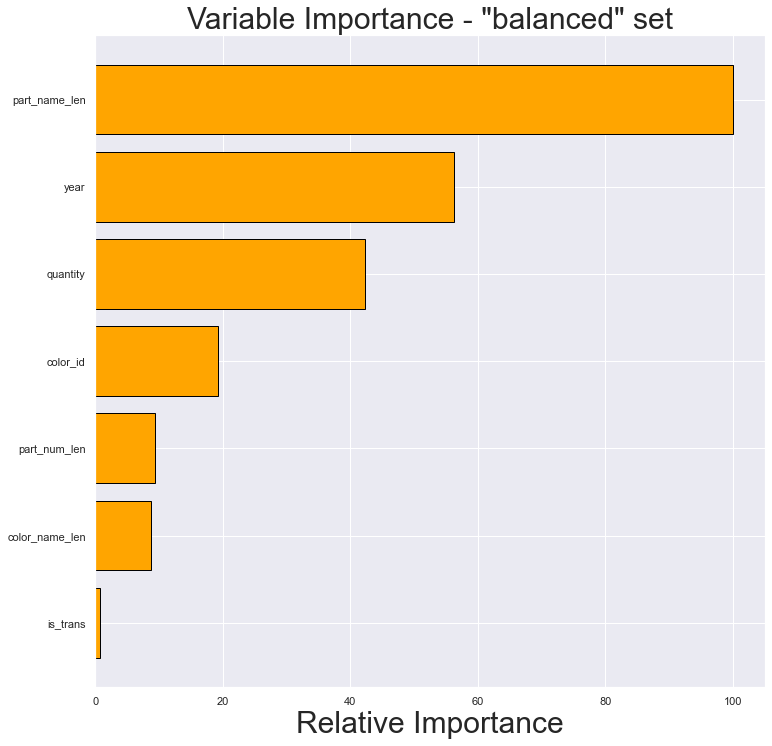

In [20]:
feature_importance = model_rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(12,12))
plt.barh(pos, feature_importance[sorted_idx], color='orange', edgecolor='black', align='center')
plt.yticks(pos, df[fn].columns[sorted_idx])
plt.xlabel('Relative Importance', fontsize=30)
plt.title('Variable Importance - "balanced" set', fontsize=30)
plt.grid(True)
plt.show()

In [21]:
ht0.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht0.csv', index=False)

In [22]:
hyper_table = list()

In [23]:
model_rf = RandomForestClassifier(n_estimators=200, random_state = 1, n_jobs=-1, class_weight='balanced')

model_rf.fit(X_train[fn], y_train)
s_train = model_rf.score(X_train[fn], y_train)
s_test = model_rf.score(X_test[fn], y_test)
y_pred = model_rf.predict(X_test[fn])

In [24]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

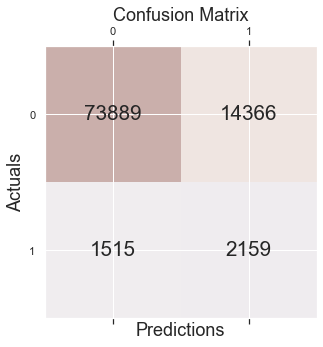

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [26]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [27]:
hyper_table.append(dict(sample='balanced', 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0])) 

In [28]:
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 24.919


In [29]:
counter

Counter({0: 883820, 1: 35468})

In [30]:
#model = XGBClassifier(scale_pos_weight=estimate)

#n_estimators = [100, 150, 200, 250]
#max_depth = [3, 5, 7, 9]
#param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
#grid_result = grid_search.fit(X, y)

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

#plt.figure(figsize=(15,10))
#scores = np.array(means).reshape(len(max_depth), len(n_estimators))
#for i, value in enumerate(max_depth):
#    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
#plt.legend()
#plt.xlabel('n_estimators')
#plt.ylabel('Log Loss')

In [31]:
model_XGB = XGBClassifier(n_estimators=200, max_depth=9, scale_pos_weight=estimate, random_state=1)
model_XGB.fit(X_train[fn], y_train)
s_train = model_XGB.score(X_train[fn], y_train)
s_test = model_XGB.score(X_test[fn], y_test)
y_pred = model_XGB.predict(X_test[fn])
predictions = [round(value) for value in y_pred]

C:\Users\marki\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:03:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [32]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

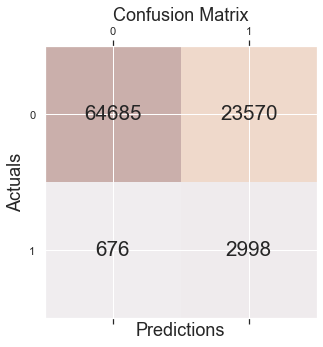

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [34]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [35]:
hyper_table.append(dict(sample=estimate, 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1,
                    model=model_XGB, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0])) 

In [36]:
ht_fr = pd.DataFrame(hyper_table)
ht_fr

,sample,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test
0,balanced,0.844416,0.827247,0.130651,0.587643,0.827247,0.213773,"(DecisionTreeClassifier(max_features='auto', r...",7,827359,91929
1,24.9188,0.744759,0.736253,0.112843,0.816004,0.736253,0.198267,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929


In [37]:
ht_fr.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_fr_bal.csv', index=False)